# cs231n 중간고사 문제 풀이
## 일시: 2021. 03. 22(MON)

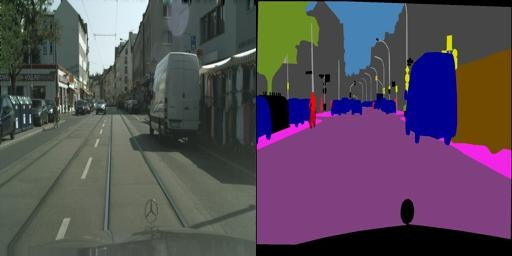

![midterm_1](midterm_1.png)

***

![1](midterm_1-1.png)

## 1. 당신은 신경망 학습을 시작했는데 loss가 거의 flat하다. 그 이유는 무엇일까?
(a) 학습률이 매우 낮다.  
(b) regularization strength(정칙화 강도) 너무 높다.  
(c) 데이터 셋 내부의 클래스 분포가 고르지 않다.  
(d) 가중치 초기화 스케일이 잘못 설정되었다.  

### 정답: a, d  
### 해설  
(a) 학습률이 낮을 경우 아래 그림과 같이 기울기를 step이 매우 작다. 또한 학습률이 낮을 경우 손실 감소가 선형(flat)의 형태를 보이면서 천천히 학습됨.  
![lr_2](lr_2.png)  
![lr_1](lr_1.png)  


(b) regularization는 오버피팅을 방지하기 위한 방안이다. L1, L2 Regularization, Dropout, Batch normalization 등이 있으며, regularization strength가 높다면 오버피팅을 방지를 강하게 한다 -> train set에만 학습이 잘되게 하는 것을 막는다 => 손실과는 무관하다. loss 변화는 알 수 없다.  

(c) 데이터 셋 내부 클래스 분포의 균일함과 손실은 무관하다. 만약 분포가 균일하지 않다면 예측 시에 다수쪽의 클래스로 많이 예측이 될 것이다.  

(d) 가중치 초기값이 잘못 설정됨에 따라 학습이 천천히 진행되게 되고 loss가 flat하게 나오게 된다. 적절한 가중치를 찾아가는데 시간이 오래 걸리기 때문

***

![1-2](midterm_1-2.png)

### 2. VGGNet은 오직 다음의 시퀀스만 사용한다. 3\*3 CONV(stride 2, pad 1),  2\*2 POOL(stride 2, pad 0). 이는 결국 완전 연결 계층과 분류기로 이행(옮겨져서 실행)된다. 총 5개의 POOL계층이 있습니다.  ImageNet에서 VGGNet은 224x224 이미지를 사용합니다. 32x32 입력(예: CIFAR-10 이미지)에서 VGGNet을 실행하려는 경우 True인 것은?
  
(a) 코드는 첫 번째 CONV 층에서 충돌이 일어날 수 있다. 그 이유는 3\*3사이즈 필터(스트라이트1, 패딩1)는 32\*32 입력에 'fit'하지 않기 때문.  
(b) 첫 번째 CONV 층에서 순전파 활성화를 저장하는 데 필요한 메모리 양은 7배 감소했다. (224/32=7)  
(c) 네트워크는 첫 번째 완전 연결 계층이 충돌할 때까지 정상적으로 실행된다.  
(d) 네트워크는 순전파가 잘 작동하지만 예측은 이미지넷 클래스 예측이 될 것이다.  

### 정답: c

### 해설
(a) 패딩이 1이라면 입력은 32\*32 -> 34\*34로 변한다. 필터 3\*3(스트라이드 1)를 거치면 `(InSize+2∗PadSize−FilterSize)/Stride+1`에 의해서 (32 + 2\*1 - 3)/1 + 1 = 로 나오게 되어 fit하게 됨을 알 수 있다.  
(b) VGGNet의 입력은 224\*224이므로 입력 사이즈가 32\*32이라면 224\*224로 resize해야 하기 때문에 메모리 양이 감소하지 않는다.  
(c) 첫 번째 CONV층을 지나면 (a)에서 구했듯이 이미지 shape는 32\*32가 되는데 2\*2 POOL(stride2, pad0)를 지나게 되면 16\*16이 되며 총 5개의 POOL 층을 지나게 되면 1\*1이 되게 된다. 그 이후에는 완전 연결 계층에 전달되고 분류기에 도달하게 된다. 여기까지는 문제없이 진행되는 점에서 (c)는 올바른 문장이다.  
(d) VGGNet의 입력은 224\*224인데 CONV & 5 POOL을 지나게 되면 7\*7이 되게 된다. 그 이후에 완전 연결 계층을 지나 분류기를 만나게 되는데 문제에서는 입력이 32\*32이므로 최종 shape이 1\*1이 되므로 이미지넷 클래스 예측이 동작하지 않을 것이다.

***

![1-3](midterm_1-3.png)

### 3. ConvNet에서의 맥스 풀링 레이어 중 옳은 설명은?
(a) CONV 레이어와 비슷한 속도로 순전파와 역전파를 처리한다. (동일한 필터 사이즈와 스트라이드를 사용)  
(b) 모든 뉴런 활동을 비슷한 범위로 유지한다는 점에서 batch normalization와 유사하다.  
(c) 기울기 확인시에 다양성에 기여할 수 있다.  
(d) 기울기 소멸 문제에 기여할 수 있다. (이 문제는 역전파 끝 부분의 기울기가 매우 작다.)  

### 정답: c

### 해설
(a) CONV 레이어보다 더 빠르다. CONV 레이어는 곱셈, 덧셈인 반면 풀링 레이어는 Max값 추출만 실행하기 때문.  
(b) Batch Normalization의 경우는 정규화를 통한 입력값의 평균과 분산을 조절하는 것이고 맥스 풀링은 단순히 입력값에 대한 연산과정일뿐이다.  
(c) 맥스 풀링은 비선형에 기여하므로 기울기의 다양성에 기여한다는 표현은 옳다.  
(d) 기울기 소멸과 맥스 풀링과는 연관성이 떨어진다. 맥스 풀링은 단순히 최대값을 선정해 전달하는데 이는 기울기가 1이 되는 것이므로 연관이 없다.

***

![2-1](midterm_2-1.png)

### 1. 당신의 신경망이 기울기 확인을 하고 있지 않다. 이러한 이유는 Vanilla SGD 대신 AdaGrad를 사용하고 있기 때문이다.

**정답: False**  

Vanilla SGD의 경우 방향에 따라 기울기가 달라지는 비등방성(anisotropy) 함수에 대해서는 탐색 경로가 비효울적이다.  
반면 AdaGrad의 경우 이러한 단점을 개선하기 위해 나왔다. 신경망이 기울기 확인을 하고 있지 않는 건 오히려 Vanilla SGD를 사용하기 때문일 것.  
- 참고 링크: https://koreanfoodie.me/178  

![SGD](SGD.png)  
![AdaGrad](AdaGrad.png)

![2-2](midterm_2-2.png)

### 2. ConvNet에 대한 입력이 0 이미지(모든 0)인 경우 클래스는 확률은 균일하게 나타납니다.

**정답: False**  

W = ax + b에서 b(bias)가 0이 아닌 경우가 있으므로 **False**

![2-3](midterm_2-3.png)

### 3. L2 가중치 정규화를 해제하면 train 세트의 정확도가 높아질 수 있습니다.

**정답: True**  

L2 가중치 정규화는 오버피팅을 방지하기 위함이다. 즉, 이를 해제하게 되면 오버피팅이 일어날 수 있다. 오버피팅은 train 세트에 대한 정확도는 올라가지만 test 세트에 대해서는 정확도가 떨어지는 현상이다.  
- 참고 링크: https://codingrabbit.tistory.com/21  

![2-4](midterm_2-4.png)

### 4. bias가 랜덤하게 주어질 때, 가중치가 모두 0으로 초기화된다면 신경망 내에서 symmetry breaking이 일어나기엔 충분하다.  

**정답: True**  

W1 = a1x + b1, W2 = W1 + a2x + b2에서 a1=0, a2 =0이라면 W1=b1이 되고 W2 = b1 + 0 + b2가 되므로 가중치 업데이트 시에 0으로만 전달되는 것이 아니라 새로운 값들이 전달되게 되므로 symmetry breaking이 일어나게 된다. symmetry breaking이란 대칭성을 없애는 개념으로 비선형성을 추가해주는 역할이라고 생각하면 된다.

![2-5](midterm_2-5.png)

### 5. 당신의 네트워크에서 몇 가중치의 손실 미분이 -3이라면 이것이 뜻하는 것은 가중치 감소가 손실 감소를 한다는 것이다.

**정답: False**  

기울기란, 소규모 가중치 증가가 있을 때 손실의 변화이다. 만약 기울기가 -3일때, 가중치에 작은 증가가 있다면 손실의 변화는 -3이라는 의미. 즉 손실은 3만큼 감소했다. 문제를 옳게 바꾸면 가중치의 감소가 손실을 증가시켰다 로 바꿔야 한다.

![2-6](midterm_2-6.png)

### 6. 신경망에서 편향을 정규화하는 것은 중요하지 않다. 왜냐하면 그들은 입력과 곱셈연산을 하지 않기 때문이다.  

**정답: True**  

W = ax + b 식을 보면 b는 덧셈연산이다. bias를 추가하는 이유를 생각하면 간단하다. 이전 레이어와의 차이를 두기 위함인데 이를 정규화하면 큰 차이가 없어 비선형성을 깨지게할 것이다.

![2-7](midterm_2-7.png)

### 7. 역전파동안 tanh를 통과하는 기울기흐름은 언제나 전체 범위보다 작거나 같다.

**정답: True**  

tanh(x)의 범위는 -1 \~ 1이므로 1-z^2의 결과는 항상 0\~1사이이다. 즉 -1\~1사이의 범위보다 작거나 같음을 알 수 있다.

![2-8](midterm_2-8.png)

### 8. 역전파하는 동안 sigmoid, tanh, ReLU를 통과하는 기울기는 부호가 변화하지 않는다.  

**정답: True**  

sigmoid, ReLU, tanh 모두 nondecreasing 함수이다. 아래 그림 참고.  
즉 부호 변화가 없다.

![nondrecease](nondrecease.png)  
  
### <center>sigmoid 함수</center>  
![sigmoid](sigmoid.png)  
### <center>ReLU 함수</center>  
![relu](relu.png)  
### <center>tanh 함수</center>  
![tanh](tanh.png)

![2-9](midterm_2-9.png)

### 9. ReLU 활성화 함수를 가진 뉴런이 모두 0인 입력을 수신하면 가중치와 편향에 대한 최종(로컬이 아님) 기울기도 0이 된다(즉, 뉴런 매개 변수 중 어떤 것도 업데이트되지 않음).

**정답: True, False 둘 다 가능(문제가 모호하다)**  

문제가 모호한 이유는 ReLU의 요소 > 0인지 ReLU의 요소 >= 0인지 정해주지 않았기 때문. 만약 **ReLU의 요소 > 0**이라고 한다면 답은 **True**이다. 
모든 요소가 0보다 크다면 ReLU의 기울기는 0이 되게 된다.  
  
만약 **ReLU의 요소 >= 0**이라고 한다면 답은 **Fasle**이다.  
모든 요소가 0보다 크거나 **같다면** 모든 입력 0에 대해서 기울기는 1이 되며 이는 0이 아님을 의미한다.

![2-10](midterm_2-10.png)

### 10. 전체 범위에 대해 Vanilla Gradient Descent를 수행할 때 파라미터 업데이트 이후에 손실 함수는 언제나 감소한다. (미니배치 없음)  

**정답: False**  

아래 그림을 보면 언제나 손실함수는 감소하지 않는다. 학습률이 클 경우 overshooting가 일어날 수 있어 증가도 가능하다.  
![lr_2](lr_2.png)  

![2-11](midterm_2-11.png)

### 11. Centered finite difference 공식을 이용해 기울기의 근사를 Uncentered 대안보다 선호하는  한 가지 이유는, kinks(꺾이는 부분)를 회피하기 더 유용하기 때문이다.  

**정답: False**  

수식(analytic)으로 계산한 Gradient가 정확한지 Numerical gradient 의 값과 비교하려 하는데  
Numerical gradient 중에서도 Centered finite difference approximation 을 사용하여 비교하면  
좀 더 적은 오차를 가진 값과 비교해볼 수 있으므로 Centered를 권장하고 있다.  

이 외 여러가지 Gradient checks를 위한 팁이 있는데 혹 ReLU와 같은 꺾임목이 있는 활성화 함수를 사용했다면 꺾임목 있는 곳을 피하기 위해 적은 데이터만 사용하여 finite different approximation을 사용하여 비교해보면 된다.  

꺾임목(kinks)를 피하기 위해 Centered를 사용하는것이 좋은것이 아니라 Gradient Checks에 좀 더 정확한 비교를 하기 위해 Centered finite difference approximation을 사용하는 것이다.  

**자세한 내용은 `cs231_midterm_true_false_11.pdf`을 참고**

![3-1](midterm_3-1.png)

![3-2](midterm_3-2.png)

![3-3-a](midterm_3-3-a.png)

![3-3-b](midterm_3-3-b.png)

![3-3-c](midterm_3-3-c.png)

![3-3-d](midterm_3-3-d.png)

![3-3-e](midterm_3-3-e.png)